In [2]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import pandas as pd
#import pooch
from glob import glob
from dateutil import parser
import cartopy.crs as ccrs                   #import projections
import cartopy
import gsw
import cftime

In [3]:
path='/Users/lfp/Downloads/requested/*.nc'

ds = xr.open_mfdataset(path,concat_dim='time',combine='nested')
#ds = ds.assign_coords(time = [parser.parse(fname.split('/')[-1].split('.')[1]) for fname in glob(path)])
for fname in glob(path):
    print(parser.parse(fname.split('/')[-1].split('.')[1]))
    

2019-07-27 00:00:00
2019-07-31 00:00:00
2019-07-15 00:00:00
2019-07-09 00:00:00
2019-07-25 00:00:00
2019-07-17 00:00:00
2019-07-11 00:00:00
2019-07-23 00:00:00
2019-07-19 00:00:00
2019-07-13 00:00:00
2019-07-29 00:00:00
2019-07-21 00:00:00
2019-07-14 00:00:00
2019-07-30 00:00:00
2019-07-26 00:00:00
2019-07-16 00:00:00
2019-07-08 00:00:00
2019-07-24 00:00:00
2019-07-22 00:00:00
2019-07-18 00:00:00
2019-07-10 00:00:00
2019-07-20 00:00:00
2019-07-12 00:00:00
2019-07-28 00:00:00


In [5]:
path='/Users/lfp/Downloads/requested/*.nc'

ds = xr.open_mfdataset(path,concat_dim='time',combine='nested')
ds = ds.assign_coords(time = [parser.parse(fname.split('/')[-1].split('.')[1]) for fname in glob(path)])
ds = ds.sortby('time')
ds

<xarray.Dataset>
Dimensions:   (time: 24, lat: 480, lon: 480, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 24.98 24.94 24.9 24.85 ... 5.146 5.104 5.062 5.021
  * lon       (lon) float32 80.02 80.06 80.1 80.15 ... 99.85 99.9 99.94 99.98
  * time      (time) datetime64[ns] 2019-07-08 2019-07-09 ... 2019-07-31
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    sst       (time, lat, lon) float32 dask.array<chunksize=(1, 480, 480), meta=np.ndarray>
    qual_sst  (time, lat, lon) float32 dask.array<chunksize=(1, 480, 480), meta=np.ndarray>
    palette   (time, rgb, eightbitcolor) uint8 dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes: (12/60)
    product_name:                     AQUA_MODIS.20190708.L3m.DAY.NSST.x_sst.nc
    instrument:                       MODIS
    title:                            MODISA Level-3 Equidistant Cylindrical ...
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    temporal_range:                   day
    ...                               ...
    processing_level:                 L3 Mapped
    cdm_data_type:                    grid
    proj4_string:                     +proj=eqc +lat_ts=0 +lat_0=0 +x_0=0 +y_...
    data_bins:                        38026
    data_minimum:                     23.96
    data_maximum:                     31.929998

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_4039/1638906963.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


IndexError: Index is not smaller than dimension 24 >= 24

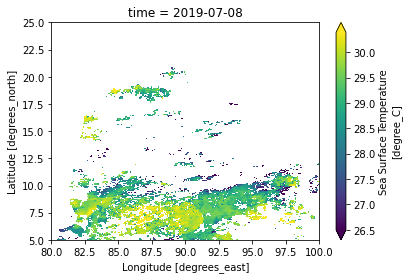

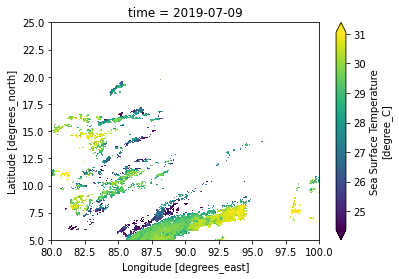

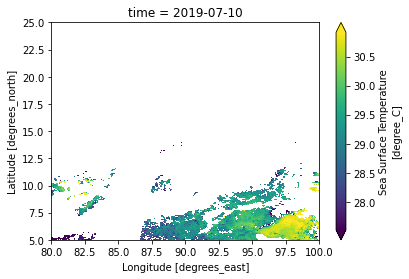

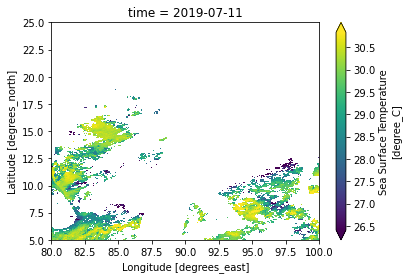

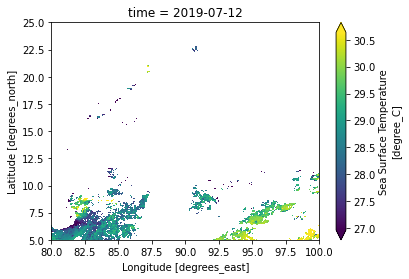

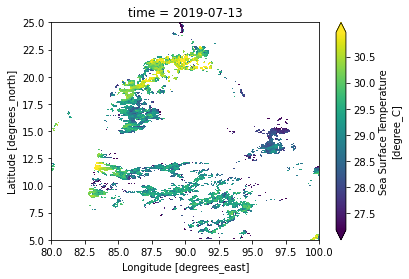

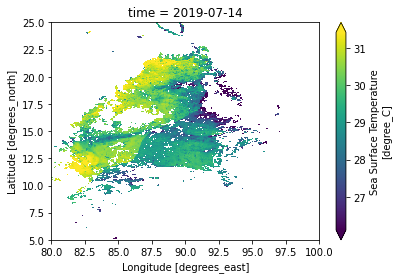

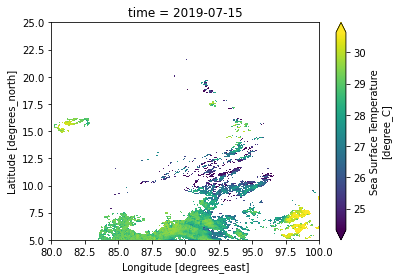

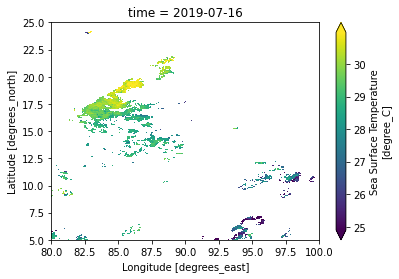

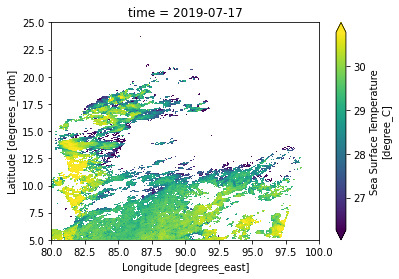

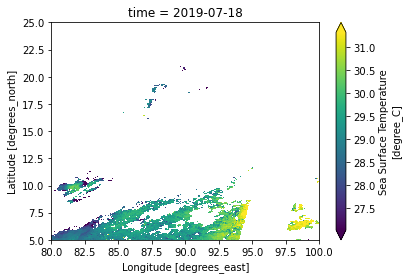

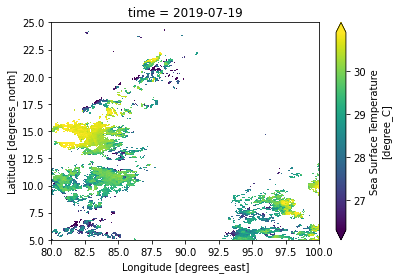

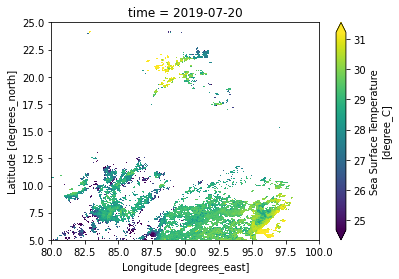

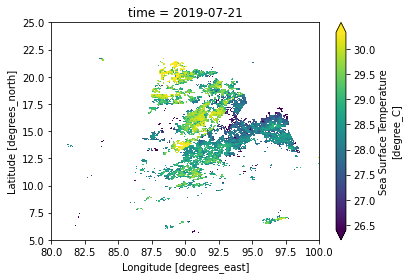

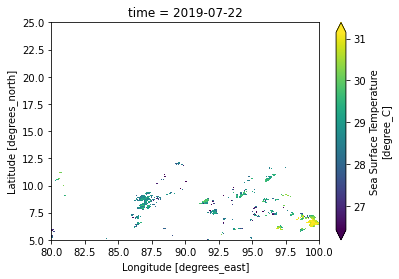

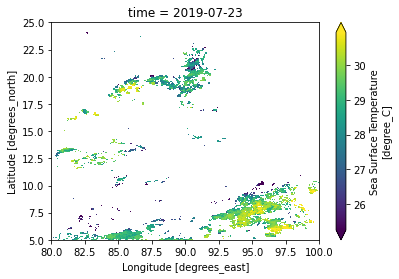

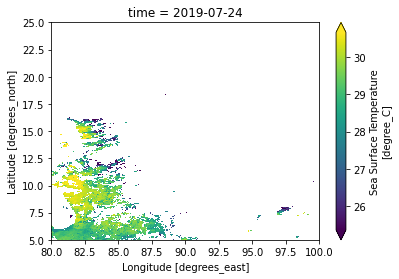

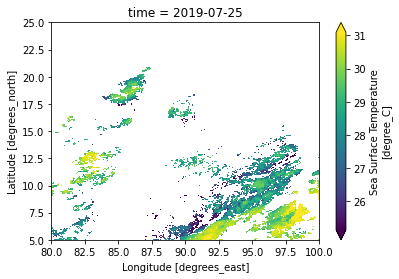

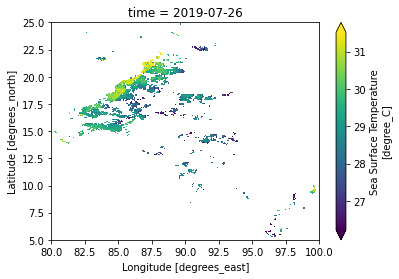

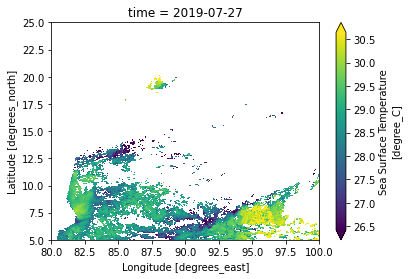

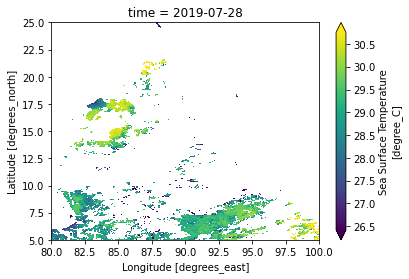

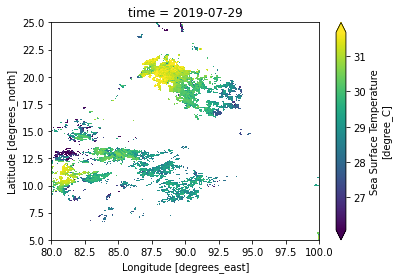

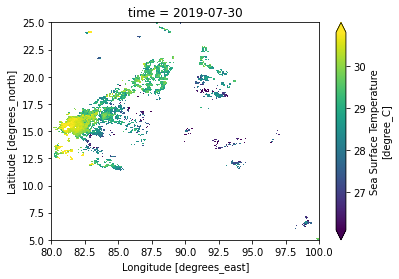

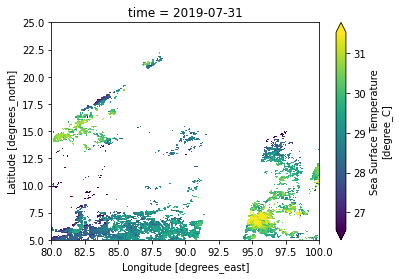

<Figure size 432x288 with 0 Axes>

In [435]:
for i in range(len(path)):
    
    #plt.axes(projection = ccrs.PlateCarree(central_longitude=200))
    ds.isel(time=i).sst.plot(robust=True)
 
    plt.figure()
    

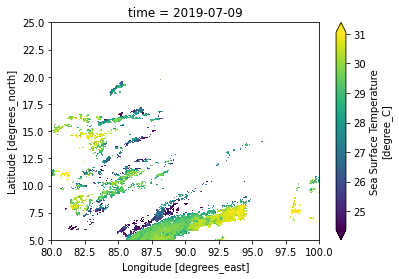

In [375]:
ds.isel(time=1).sst.plot(robust=True)

/var/folders/x9/37hmb2cj4j72s26nwv19n_xh0000gn/T/ipykernel_4039/2159283021.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


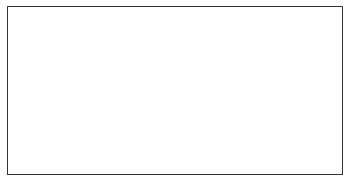

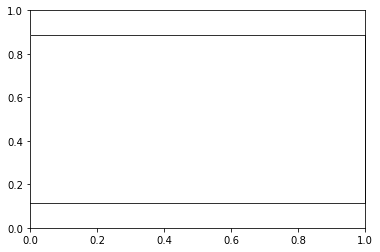

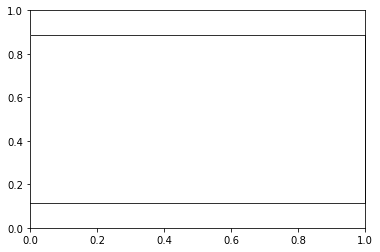

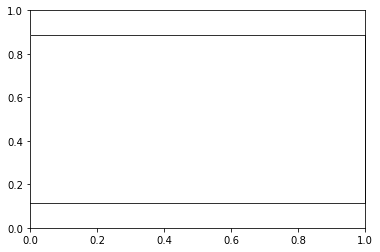

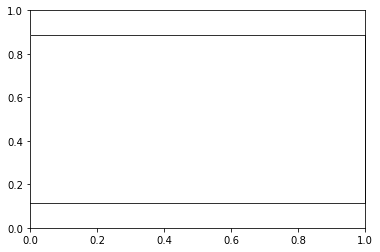

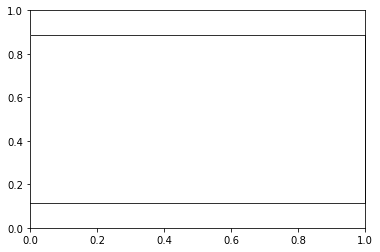

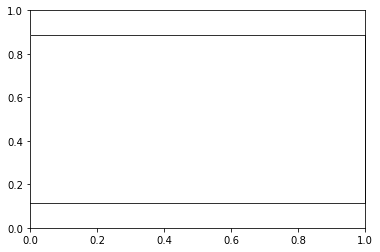

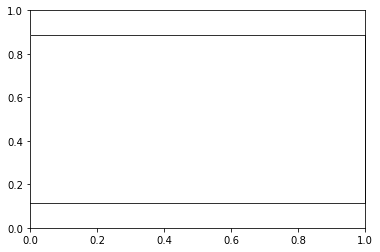

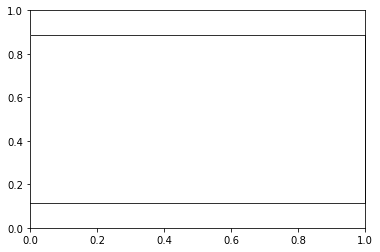

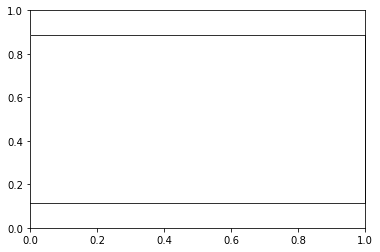

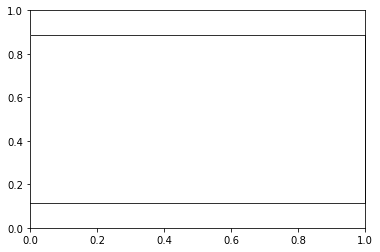

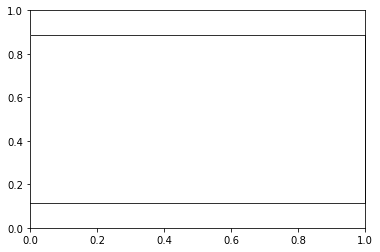

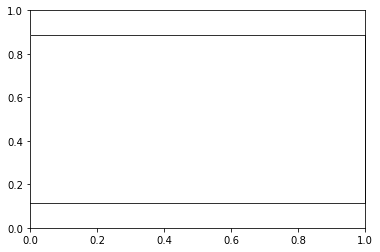

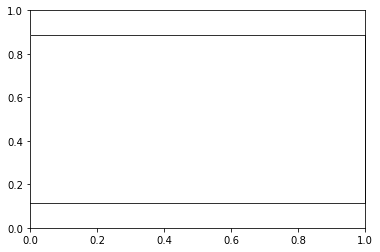

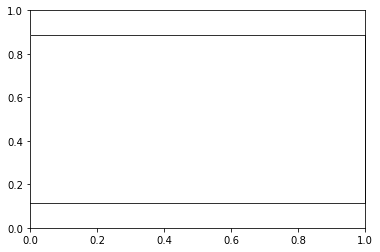

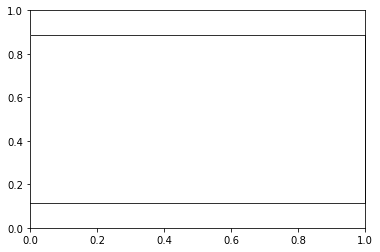

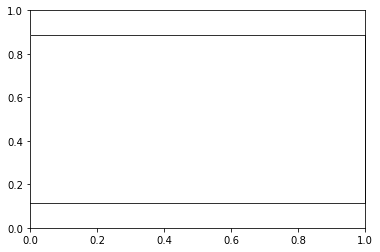

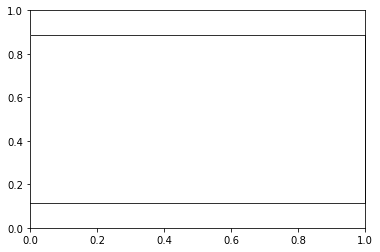

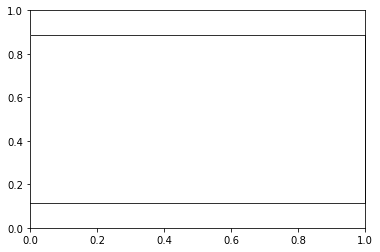

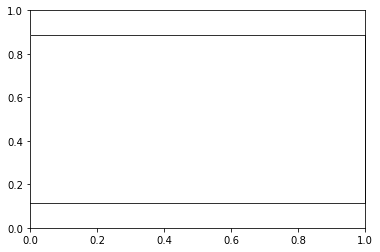

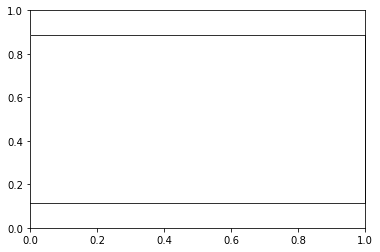

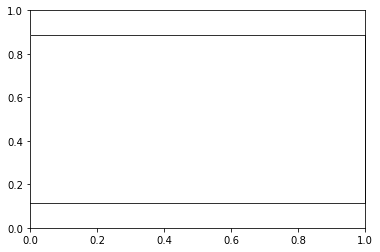

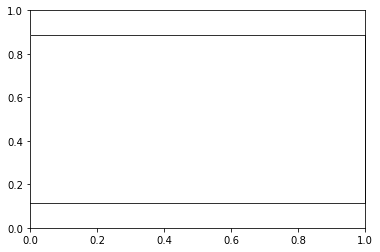

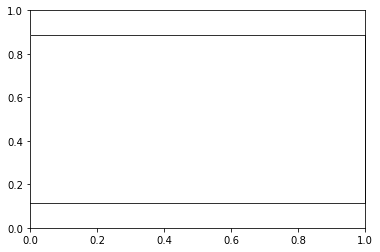

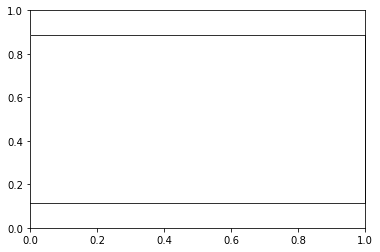

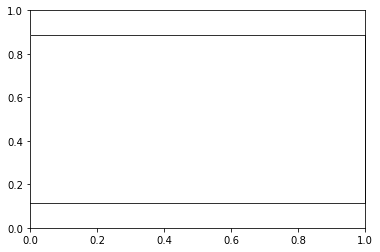

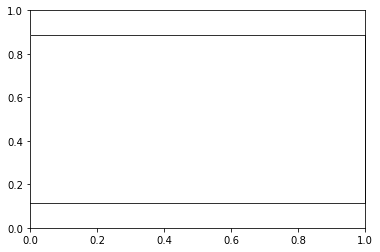

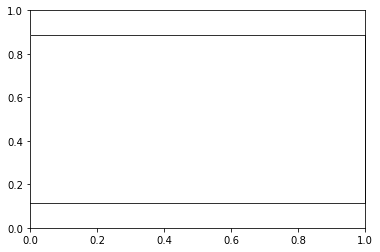

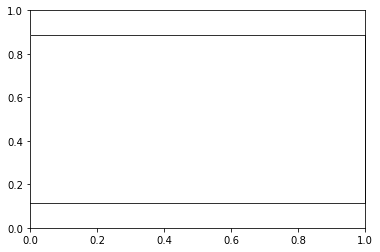

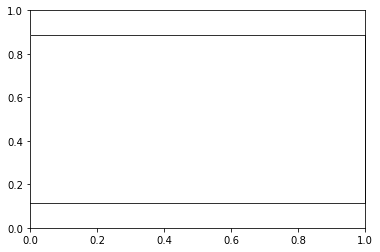

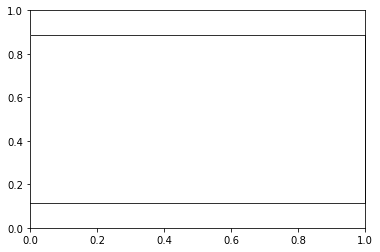

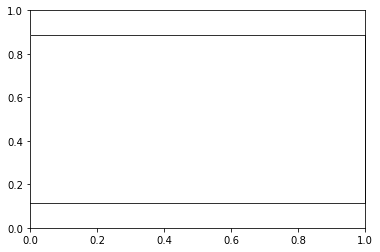

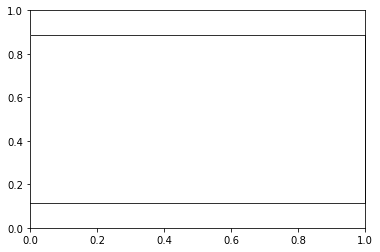

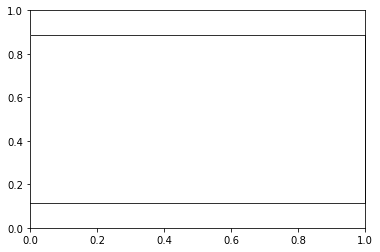

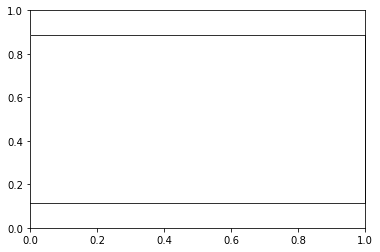

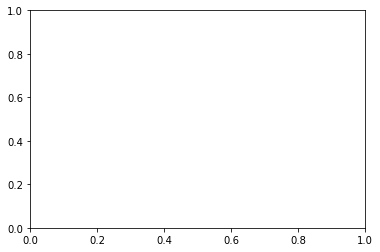

In [451]:
for i in range(len(path)):
    
    plt.axes(projection = ccrs.PlateCarree(central_longitude=200))
    
    #ds.isel(time=i).sst.plot(robust=True)
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': 15, 'color': 'gray'}
    gl.xlabel_style = {'color': 'red', 'weight': 'bold'}
    
    plt.figure()

    levels = 10
    cs = ax.contourf(ds.lon,ds.lat,np.squeeze(sst), levels, extend='both', transform=ccrs.PlateCarree())
    #cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
    cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
    #cb = plt.colorbar(cs,fraction = 0.022, extend='both')
    cb.set_label('SLA [m]',fontsize = 10)
    ax.coastlines()
    ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')

 
    

AttributeError: 'numpy.ndarray' object has no attribute 'gridlines'

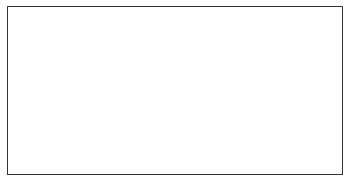

In [437]:

for i in path:
   
    plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
    
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.ylabels_right = False
    
    
    
    plt.figure()
'''
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('BoB SLA')
    
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
    
levels = 10
cs = ax.contourf(ds.lon,ds.lat,np.squeeze(sst), levels, extend='both', transform=ccrs.PlateCarree())
cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb.set_label('SST [C]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
    


gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
        
levels = 10
cs = ax.contourf(ds.lon,ds.lat,np.squeeze(sst), levels, extend='both', transform=ccrs.PlateCarree())
cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb.set_label('SST [C]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
'''
    

In [156]:
'''
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('BoB SLA')
plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
        
levels = 10
cs = ax.contourf(ds.lon,ds.lat,np.squeeze(sst), levels, extend='both', transform=ccrs.PlateCarree())
cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
cb.set_label('SST [C]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')
'''


"\nax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic\nax.set_title('BoB SLA')\nplt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))\nplt.set_cmap(cmap=plt.get_cmap('turbo'))\ngl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')\ngl.top_labels = False\ngl.ylabels_right = False\n        \nlevels = 10\ncs = ax.contourf(ds.lon,ds.lat,np.squeeze(sst), levels, extend='both', transform=ccrs.PlateCarree())\ncb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)\ncb.set_label('SST [C]',fontsize = 10)\nax.coastlines()\nax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')\n"

In [100]:
sst = ds.sst

IndexError: too many indices

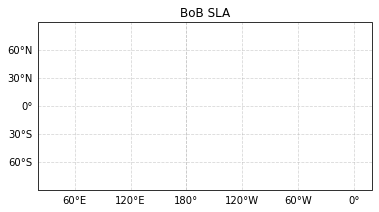

In [82]:
timeindex = 10
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude=200))  # Orthographic
ax.set_title('BoB SLA')
plt.set_cmap(cmap=plt.get_cmap('nipy_spectral'))
plt.set_cmap(cmap=plt.get_cmap('turbo'))
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha=0.5, linestyle='--')
gl.top_labels = False
gl.ylabels_right = False
#gl.xlabel_style = {'size': 15, 'color': 'gray'}
#gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


levels = 10
cs = ax.contourf(ds.lon,ds.lat,np.squeeze(sst[timeindex ,:,:]), levels, extend='both', transform=ccrs.PlateCarree())
#cs = ax.pcolormesh(ds.longitude,ds.latitude,np.squeeze(ds.sla), vmin=levels[0], vmax=levels[-1], transform=ccrs.PlateCarree())
cb = plt.colorbar(cs,ax=ax,shrink=.8,pad=.05)
#cb = plt.colorbar(cs,fraction = 0.022, extend='both')
cb.set_label('SLA [m]',fontsize = 10)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND, zorder=3, facecolor=[.6,.6,.6], edgecolor='black')


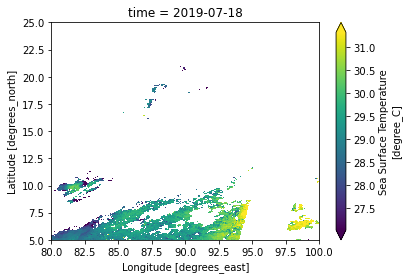

In [69]:
ds.isel(time=10).sst.plot(robust=True)

In [22]:
ds.sel(time='2019-07-07',method='nearest')

<xarray.Dataset>
Dimensions:   (time: 0, lat: 480, lon: 480, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat       (lat) float32 24.98 24.94 24.9 24.85 ... 5.146 5.104 5.062 5.021
  * lon       (lon) float32 80.02 80.06 80.1 80.15 ... 99.85 99.9 99.94 99.98
  * time      (time) datetime64[ns] 
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    sst       (time, lat, lon) float32 
    qual_sst  (time, lat, lon) float32 
    palette   (time, rgb, eightbitcolor) uint8 
Attributes: (12/60)
    product_name:                     AQUA_MODIS.20190727.L3m.DAY.NSST.x_sst.nc
    instrument:                       MODIS
    title:                            MODISA Level-3 Equidistant Cylindrical ...
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    temporal_range:                   day
    ...                               ...
    processing_level:                 L3 Mapped
    cdm_data_type:                    grid
    proj4_string:                     +proj=eqc +lat_ts=0 +lat_0=0 +x_0=0 +y_...
    data_bins:                        21265
    data_minimum:                     23.424997
    data_maximum:                     32.05946

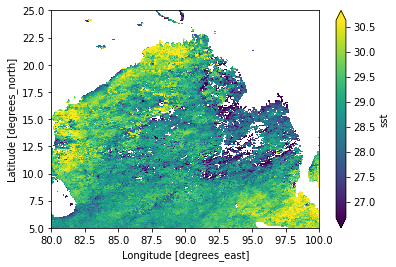

In [25]:
ds.sst.mean('time').plot(robust=True)

NameError: name 'tickers' is not defined

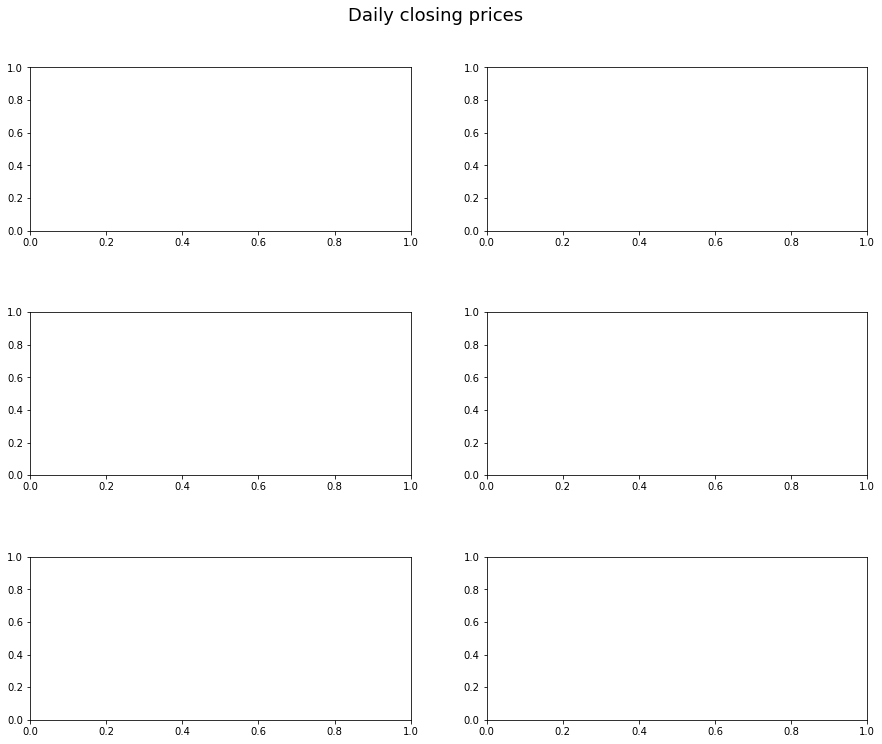

In [315]:
# define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Daily closing prices", fontsize=18, y=0.95)

# loop through tickers and axes
for ticker, ax in zip(tickers, axs.ravel()):
    # filter df for ticker and plot on specified axes
    df[df["ticker"] == ticker].plot(ax=ax)

    # chart formatting
    ax.set_title(ticker.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")

plt.show()